## One Stage Detector
- 속도가 빨라 Real time object detection이 가능하다.
- feature map에서 바로 객체의 위치와 종류를 찾는다.
- 영역을 따로 추출할 필요가 없다.
- 대표적인 모델 : Yolo family, SSD, RetinaNet

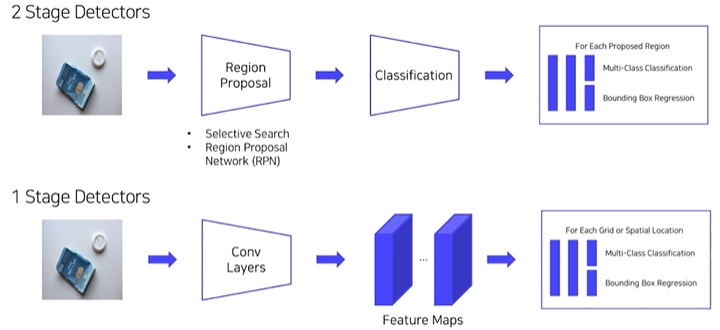

---
## YOLO v1
1. 입력 이미지를 7x7 그리드 영역으로 나눔. (논문에서 S = 7로 설정)
    - 최종 output 사이즈가 7 x 7 이기 때문에 7로 설정했다.
    
    
2. 각 그리드마다 B개의 bounding box와 confidence score 계산 (논문에선 B = 2로 설정)
    - 7 x 7 x 2 = 98개의 박스
    - 신뢰도 : 박스에 물체가 있을 확률 x GT와의 IoU


3.  각 그리드마다 C개의 클래스에 대한 확률 계산 (논문, C = 20 설정)
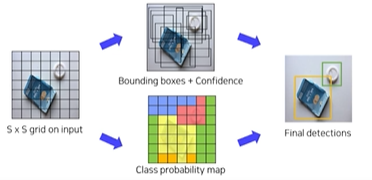

- output size는 30 * 7 * 7 이다.
- 하나의 입력 이미지의 그리드는 채널을 30개 갖는다.
    - 첫 5개는 첫 bbox에 대한 정보 : x좌표, y좌표, bbox 너비, bbox 높이, bbox confidence scroe
    - 다음 5개는 두번째 bbox에 대한 정보. 
    - (현재 B = 2 이기 때문)
    - 나머지 10개는 Class의 개수 (C = 20 으로 설정)
    
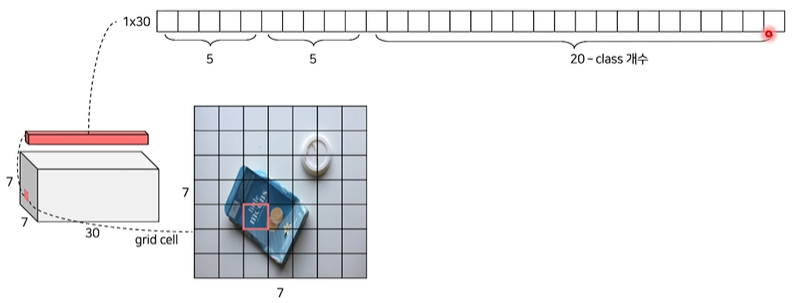

### Inference 과정
- 첫번째 bbox의 confidence score와 Class 확률을 전부 곱한다.
- 두번째 bbox도 위와 마찬가지로 진행
- 이렇게 되면, 하나의 그리드 셀마다 총 2개의 값(박스)이 나오게 된다.
- 최종적으로 그리드가 49개이므로, 98개의 값(박스)가 나오게 된다.

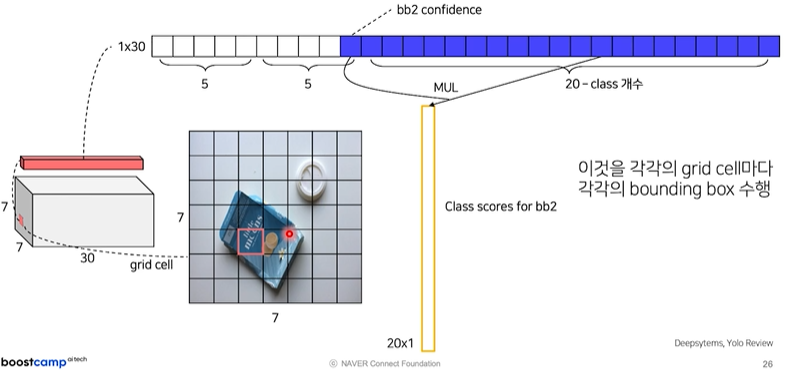

- 맨 위에는 첫번째 클래스에 대한 score를 나타냄.
- 점수가 특정 threshold보다 작으면 없앨 수 있음.
- 내림차순으로 정렬을 한다.
- 그 다음에 NMS를 진행하게 된다.
- 최종적으로 남아있는 box들을 object에 그려주게 된다.


*밑에 그림을 예로 들면, bb3과 bb1에 대해서 종이상자를 그려주면 된다.*

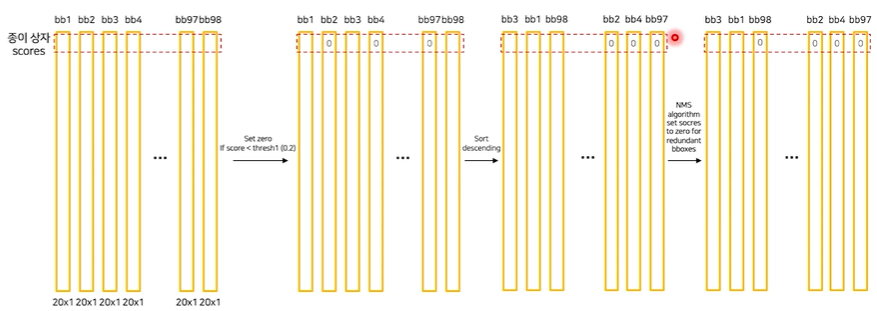

### Loss
#### Localization loss
- 각 그리드셀에 각 박스별로 물체가 있을 때, 
- 중심점의 위치를 regression loss를 구한다.
- 그리고 각 그리드셀에 각 박스별로 물체가 있을 때,
- width와 height를 regression loss를 구한다.
- 람다는 loss를 조절하는 하이퍼파라미터

#### Confidence loss
- 각 그리드셀에 각 박스별로 물체가 있을 때, confidence loss를 구하고
- 각 그리드셀에 각 박스별로 물체 없을 때, confidence loss를 구한다.
- 람다는 마찬가지로 밸런스를 조절하는 하이퍼 파라미터

#### Classification loss
- 각 그리드셀 별로 물체가 있을 때, 클래스에 대한 확률에 대해 MSE를 계산


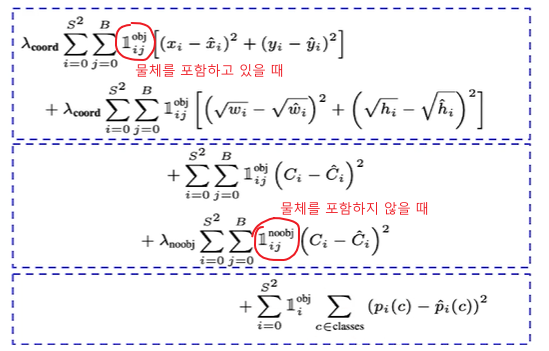

### 단점
- 7 x 7 그리드로 예측을 진행했기 때문에, 그리드보다 작은 물체를 식별 못함.
- 신경망을 통과하며 마지막 feature만 사용해서 정확도가 떨어짐.

---
## SSD
- vgg 16 백본 모델을 통과하고
- 마지막 feature map으로부터 extra convolution을 진행한다.
- 즉, 새롭게 여러 conv feature를 더 만든다.
- 그리고 이 feature map들을 모두 detection에 사용한다.


- early stage(큰 feature map)은 작은 물체 탐지에 유리해지고
- late stage(작은 feature map)은 큰 물체 탐지에 유리해진다.


- 그리고 FC layer를 사용하지 않고 conv layer를 사용했기 때문에 속도도 빨라짐
- Default Box를 사용함 (anchor box와 비슷한 역할)

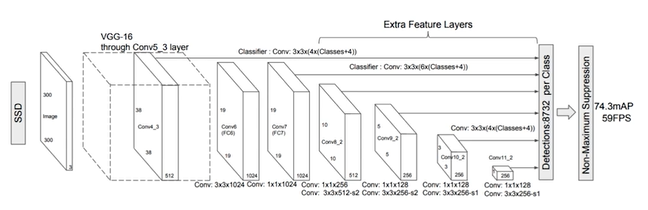

### Multi scale feature maps
- 채널을 3x3 conv를 통해 정해진 채널로 바꾸게 된다.
- $C = N_{Bbox} * (Offset + N_C)$ 


- N_bbox : 박스의 개수 (여기선 6개)
- Offset : 중심점 좌표 x와 y, width, height 총 4개
- N_C : 클래스 개수 20개 + 배경 1개, 총 21개
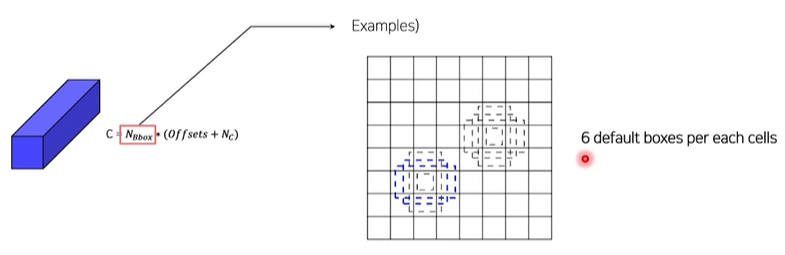

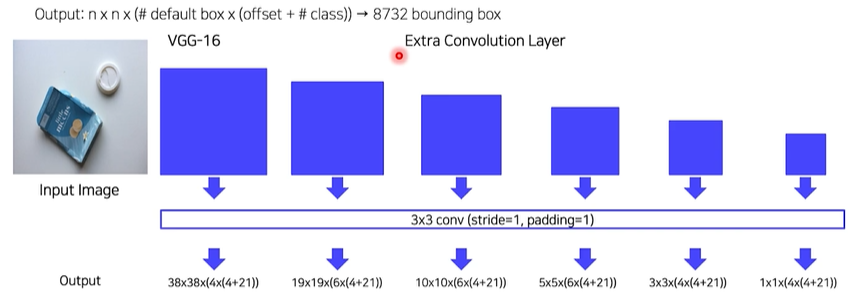

---
## YOLO v2
- v1에서 정확도, 속도 측면에서 발전하고
- 더 많은 클래스의 개수를 예측하고자 한다. 80개에서 9000개로 증가


- Batch Normalization을 통해 mAP가 올랐고
- FC layer를 제거했음


- v1에서는 그리드마다 bbox를 랜덤으로 생성했지만, v2에서는 기준이 되는 anchor box를 도입했다. (5개 사용)
- 좌표값 자체를 맞추는 것보다, offset을 예측하게 바꿨다는 것이다. (기존의 anchor box로부터 얼마나 움직일지를 예측하는 것)


- early stage feature map을 late feature map에 합쳐주는 passthrough layer를 도입했다.
- feature map를 쪼갠다음에 channel wise하게 concat한다. 그 후 late stage feature map에 추가하는 방법임.
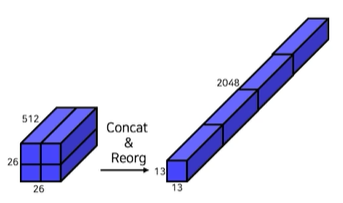


- Multi scale training을 도입함
- 다양한 입력 이미지를 사용한 것.


- DarkNet를 사용함.


- ImageNet과 COCO를 둘 다 사용했다
- WordTree를 구성해서 총 9000개가 넘는 카테고리를 만들었다.

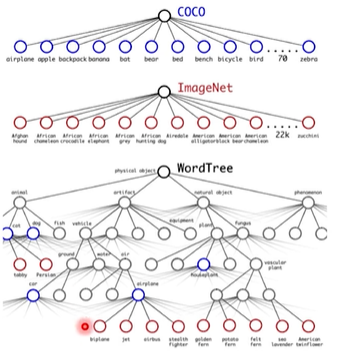

---
## YOLO v3
- backbone을 개선함. (DarkNet 개선)
- skip connection을 적용했다
- Multi scale Feature maps를 도입함. (FPN을 활용)
    - feature pyramid network를 사용함 (NECK 구조)


---
## RetinaNet
- 1 stage network는 background를 포함할 확률이 높아진다.
- anchor box가 배경을 포함할 확률이 높아서 class imbalance 문제가 생길 수밖에 없다.
- 이를 해결하고자 RetinaNet이 나옴

### Focal Loss
- 크로스 엔트로피에 Scaling factor를 만들어서, 쉬운 예제에는 작은 가중치, 어려운 예제에는 큰 가중치를 두는 방식을 사용한다.
- 결과적으로 어려운 예제에 집중하도록 한다.ㅋ

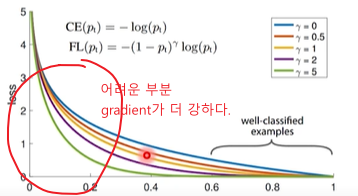